
# Construction of arxiv hypergraph

We construct hypergraph given arxiv data.

# Loading arxiv datasets

We are loading the full dataset and then split it into subset of periods.

Common work on arxiv:
w/ Marc Santolini, Hritika Kathuria

Common work on hypergraph distances:
w/ Ekaterina Vasilieva, Dmitrii Fedorov

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('fullArxivWithOrcidAndCitations.csv', index_col=0, header=0, sep=',')

df = df.sort_values(by='created')
df['year'] = pd.DatetimeIndex(df['created']).year
df = df[pd.DatetimeIndex(df['created']).year >= 1992]


print('printing full dataset')

df.head(30)

work w initial dataset, on different time periods/stages for information/knowledge exploration

In [ ]:
import pandas as pd

# Attempt to read the file, handling potential errors
try:
    df = pd.read_csv('fullArxivWithOrcidAndCitations.csv', index_col=0, header=0, sep=',')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Check for potential issues like incorrect quoting or missing values around row 651796
    !head -n 651798 fullArxivWithOrcidAndCitations.csv | tail -n 3  # Print lines around the problematic row

df = df.sort_values(by='created')
df['year'] = pd.DatetimeIndex(df['created']).year
df = df[pd.DatetimeIndex(df['created']).year >= 1992]

print('printing full dataset')
df.head(30)

In [ ]:
# Define the time periods
periods = {
    '1990-2000': (1990, 2000),
    '2000-2010': (2000, 2010),
    '2010-2020': (2010, 2020)
}

# Split the data into the defined periods
period_data = {key: df[(df['year'] >= start) & (df['year'] < end)] for key, (start, end) in periods.items()}

In [ ]:
def create_hypergraph(df):
    """
    Create a hypergraph from the DataFrame based on article categories.

    Parameters:
    - df (DataFrame): The DataFrame containing article data.

    Returns:
    - hypergraph (list): A list of lists representing hyperedges in the hypergraph.
    """
    hypergraph = []
    for _, row in df.iterrows():
        tags = row['categories'].split()
        hypergraph.append(tags)
    return hypergraph

# Create hypergraphs for each period
hypergraphs = {key: create_hypergraph(data) for key, data in period_data.items()}


In [ ]:
hypergraphs

{'1990-2000': [],
 '2000-2010': [['math.co', 'cs.cg'],
  ['cs.ds'],
  ['quant-ph', 'cs.it', 'math.it'],
  ['cs.ne', 'cs.ai'],
  ['cs.ne', 'cs.ai'],
  ['cs.ce', 'cond-mat.stat-mech', 'cs.ms', 'cs.na', 'physics.data-an'],
  ['cs.it', 'math.it'],
  ['cs.cc'],
  ['cs.cc'],
  ['cs.cc'],
  ['cs.it', 'math.it'],
  ['cs.it', 'cs.cc', 'math.it'],
  ['cs.it', 'cs.ai', 'math.it', 'q-bio.pe'],
  ['cs.cc', 'cs.dm'],
  ['cs.dm', 'cs.lo'],
  ['cs.cc'],
  ['cs.it', 'math.it'],
  ['cs.cc', 'cs.ds'],
  ['cs.it', 'math.it'],
  ['cs.cr'],
  ['cs.ni', 'cs.it', 'math.it'],
  ['cs.it', 'math.it'],
  ['cs.it', 'cs.lg', 'math.it'],
  ['cs.it', 'math.it'],
  ['cs.pf', 'cs.ni'],
  ['cs.ds', 'cs.pf'],
  ['cs.it', 'math.it'],
  ['cs.it', 'math.it'],
  ['cs.it', 'math.it'],
  ['cs.ds'],
  ['cs.it', 'math.it'],
  ['cs.pf', 'cs.se'],
  ['cs.dc'],
  ['cs.pf'],
  ['cs.pf', 'cs.cr'],
  ['cs.it', 'cs.ar', 'math.it'],
  ['cs.pf'],
  ['cs.it', 'cs.lg', 'math.it'],
  ['cs.cr'],
  ['cs.ne', 'cs.ai'],
  ['cs.lg', 'cs.sc'],
  

# Motif Analysis

In [ ]:
import csv
import ast
from collections import Counter
import matplotlib.pyplot as plt
from itertools import combinations
import time

def analyze_hypergraph(hypergraph):
  """
  Analyzes a hypergraph structure and returns motif counts and optionally the graph (based on your definition).

  Returns:
      dict: A dictionary containing:
          - 'motif_counts': Counts of various hypergraph motifs (triples, duples, etc.).
          - 'graph' (optional): The graph representation of the hypergraph (definition depends on your use case).
  """

  # Function to read hypergraph from CSV (if needed)
  def read_hypergraph_from_csv(filename):
      edges = []
      with open(filename, 'r', encoding='utf-8') as file:
          for line in file:
              edge = ast.literal_eval(line.strip())
              edges.append(tuple(edge))
      return edges

  # Data Preprocessing
  def parse_hypergraph(hypergraph):
      edges = []
      for edge in hypergraph:
          edges.append(tuple(sorted(edge)))
      return edges


  # Functions to find specific hyperedge structures
  def find_triples(edges):
      triples = []
      start_time = time.perf_counter()
      for edge in edges:
          if len(edge) == 3:
              triples.append(edge)
      end_time = time.perf_counter()
      computation_time = end_time - start_time
      return triples, computation_time

  def find_duples(edges):
      duples = []
      start_time = time.perf_counter()
      for edge in edges:
          if len(edge) == 2:
              duples.append(edge)
      end_time = time.perf_counter()
      computation_time = end_time - start_time
      return duples, computation_time

  def find_intersecting_triple_lollipop(triples, duples):
      intersecting = []
      start_time = time.perf_counter()
      for i in range(len(triples)):
          for j in range(len(duples)):
              intersection = set(triples[i]).intersection(duples[j])
              if len(intersection) == 1:
                  intersecting.append(tuple(sorted(list(intersection) + list(set(triples[i] + duples[j]) - intersection))))
      end_time = time.perf_counter()
      computation_time = end_time - start_time
      intersecting = list(set(intersecting))
      return intersecting, computation_time

    # def find_circles(edges):
  #   circles = []
  #   start_time = time.perf_counter()
  #   for edge in edges:
  #       if len(edge) == 4:
  #           subedges = [(edge[i], edge[(i + 1) % 4]) for i in range(4)]
  #           if all(set(subedge) in [set(e) for e in edges] for subedge in subedges):
  #               circles.append(tuple(edge))
  #   end_time = time.perf_counter()
  #   computation_time = end_time - start_time
  #   return circles, computation_time

  def find_quadruples(edges):
    quadruples = []
    start_time = time.perf_counter()
    for edge in edges:
        if len(edge) >= 4:
            quadruples.extend(combinations(edge, 4))
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return quadruples, computation_time

  # Motif Counting
  def count_motifs(edges):
      triples, time_triples = find_triples(edges)
      duples, time_duples = find_duples(edges)
      lollipop, time_lollipop = find_intersecting_triple_lollipop(triples, duples)
      # circles, time_circles = find_circles(edges)
      quadruples, time_quadruples = find_quadruples(edges)
      motif_counts = {
          "Edges": len(edges),
          "Triples": len(triples),
          "Edges Sharing Node": len(duples),
          "Triple-Duple Intersections": len(lollipop),
          # "Circles":len(circles),
          "Quadruples": len(quadruples),
    }

      computation_times = {
          "Triples": time_triples,
          "Duples": time_duples,
          "Triple-Duple Intersections": time_lollipop,
          # "Circles": time_circles,
          "Quadruples": time_quadruples,
      }
      return motif_counts, computation_times


      # Process the hypergraph data
      edges = parse_hypergraph(hypergraph)  # Assuming hypergraph_data is the input list of edges
      # edges = edges[0]



      # Find motifs and counts
      motif_counts, computation_times = count_motifs(edges)

      # You can implement logic here to generate the graph representation based on your needs (e.g., adjacency list, adjacency matrix)
      graph = None  # Placeholder, replace with your graph generation logic

      # Return results
      return {
          "motif_counts": motif_counts,
          "graph": graph,  # Update with actual graph if implemented
          "computation_times": computation_times,
      }



In [ ]:
import csv
import ast
from collections import Counter
import matplotlib.pyplot as plt
from itertools import combinations
import time

def analyze_hypergraph(hypergraph):
  """
  Analyzes a hypergraph structure and returns motif counts and optionally the graph (based on your definition).

  Returns:
      dict: A dictionary containing:
          - 'motif_counts': Counts of various hypergraph motifs (triples, duples, etc.).
          - 'graph' (optional): The graph representation of the hypergraph (definition depends on your use case).
  """

  # Function to read hypergraph from CSV (if needed)
  def read_hypergraph_from_csv(filename):
    edges = []
    with open(filename, 'r', encoding='utf-8') as file:
      for line in file:
        edge = ast.literal_eval(line.strip())
        edges.append(tuple(edge))
    return edges

  # Data Preprocessing
  def parse_hypergraph(hypergraph):
    edges = []
    for edge in hypergraph:
      edges.append(tuple(sorted(edge)))
    return edges


  # Functions to find specific hyperedge structures
  def find_triples(edges):
    triples = []
    start_time = time.perf_counter()
    for edge in edges:
      if len(edge) == 3:
        triples.append(edge)
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return triples, computation_time

  def find_duples(edges):
    duples = []
    start_time = time.perf_counter()
    for edge in edges:
      if len(edge) == 2:
        duples.append(edge)
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return duples, computation_time

  def find_intersecting_triple_lollipop(triples, duples):
    intersecting = []
    start_time = time.perf_counter()
    for i in range(len(triples)):
      for j in range(len(duples)):
        intersection = set(triples[i]).intersection(duples[j])
        if len(intersection) == 1:
          intersecting.append(tuple(sorted(list(intersection) + list(set(triples[i] + duples[j]) - intersection))))
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    intersecting = list(set(intersecting))
    return intersecting, computation_time

  # def find_circles(edges):
  #   circles = []
  #   start_time = time.perf_counter()
  #   for edge in edges:
  #       if len(edge) == 4:
  #           subedges = [(edge[i], edge[(i + 1) % 4]) for i in range(4)]
  #           if all(set(subedge) in [set(e) for e in edges] for subedge in subedges):
  #               circles.append(tuple(edge))
  #   end_time = time.perf_counter()
  #   computation_time = end_time - start_time
  #   return circles, computation_time

  def find_quadruples(edges):
    quadruples = []
    start_time = time.perf_counter()
    for edge in edges:
        if len(edge) >= 4:
            quadruples.extend(combinations(edge, 4))
    end_time = time.perf_counter()
    computation_time = end_time - start_time
    return quadruples, computation_time

    # Motif Counting
  def count_motifs(edges):
    triples, time_triples = find_triples(edges)
    duples, time_duples = find_duples(edges)
    lollipop, time_lollipop = find_intersecting_triple_lollipop(triples, duples)
    # circles, time_circles = find_circles(edges)
    quadruples, time_quadruples = find_quadruples(edges)
    motif_counts = {
      "Single Edges": len(edges),
      "Triples": len(triples),
      "Pairs Sharing Vertex": len(duples),
      "Triple-Duple Intersections": len(lollipop),
      # "Circles":len(circles),
      "Quadruples": len(quadruples),
    }
    computation_times = {
      "Triples": time_triples,
      "Duples": time_duples,
      "Triple-Duple Intersections": time_lollipop,
      # "Circles": time_circles,
      "Quadruples": time_quadruples,
    }
    return motif_counts, computation_times


  # Process the hypergraph data
  edges = parse_hypergraph(hypergraph)  # Assuming hypergraph_data is the input list of edges
  # edges = edges[0]



  # Find motifs and counts
  motif_counts, computation_times = count_motifs(edges)

  # You can implement logic here to generate the graph representation based on your needs (e.g., adjacency list, adjacency matrix)
  graph = None  # Placeholder, replace with your graph generation logic

  # Return results
  return {
      "motif_counts": motif_counts,
      "graph": graph,  # Update with actual graph if implemented
      "computation_times": computation_times,
  }



# result = analyze_hypergraph('/content/hyperedges_list_arxiv_test.csv')



Motifs in period 1990-2000: {'motif_counts': {'Single Edges': 0, 'Triples': 0, 'Pairs Sharing Vertex': 0, 'Triple-Duple Intersections': 0, 'Quadruples': 0}, 'graph': None, 'computation_times': {'Triples': 8.089999994354002e-07, 'Duples': 2.8899998483211675e-07, 'Triple-Duple Intersections': 1.7670000147518294e-06, 'Quadruples': 3.3200001325894846e-07}}
Motif Counts: {'Single Edges': 0, 'Triples': 0, 'Pairs Sharing Vertex': 0, 'Triple-Duple Intersections': 0, 'Quadruples': 0}


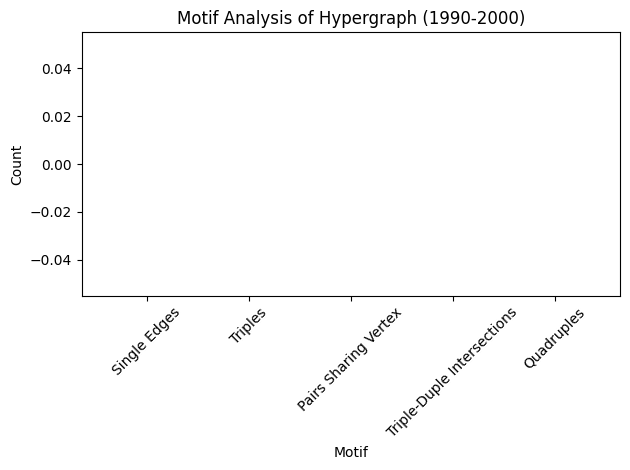

Computation Times: {'Triples': 8.089999994354002e-07, 'Duples': 2.8899998483211675e-07, 'Triple-Duple Intersections': 1.7670000147518294e-06, 'Quadruples': 3.3200001325894846e-07}
Motifs in period 2000-2010: {'motif_counts': {'Single Edges': 10755, 'Triples': 1384, 'Pairs Sharing Vertex': 4661, 'Triple-Duple Intersections': 18695, 'Quadruples': 4091}, 'graph': None, 'computation_times': {'Triples': 0.0010435909999841897, 'Duples': 0.0011384139999961462, 'Triple-Duple Intersections': 5.240384661999997, 'Quadruples': 0.0024171310000156154}}
Motif Counts: {'Single Edges': 10755, 'Triples': 1384, 'Pairs Sharing Vertex': 4661, 'Triple-Duple Intersections': 18695, 'Quadruples': 4091}


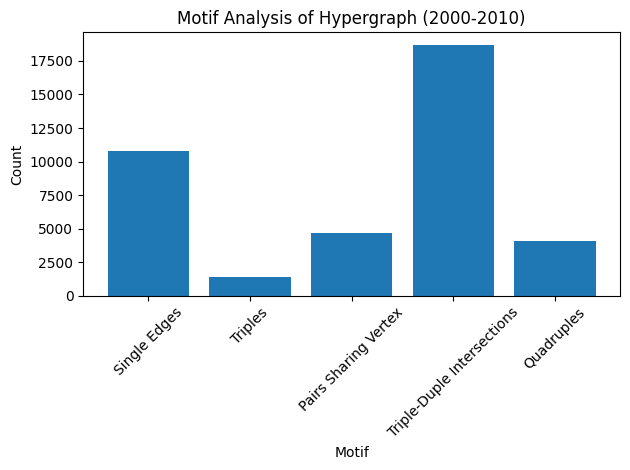

Computation Times: {'Triples': 0.0010435909999841897, 'Duples': 0.0011384139999961462, 'Triple-Duple Intersections': 5.240384661999997, 'Quadruples': 0.0024171310000156154}
Motifs in period 2010-2020: {'motif_counts': {'Single Edges': 125, 'Triples': 31, 'Pairs Sharing Vertex': 47, 'Triple-Duple Intersections': 94, 'Quadruples': 9}, 'graph': None, 'computation_times': {'Triples': 1.2984999983700618e-05, 'Duples': 1.2919999988980635e-05, 'Triple-Duple Intersections': 0.0009032419999925878, 'Quadruples': 1.473700001497491e-05}}
Motif Counts: {'Single Edges': 125, 'Triples': 31, 'Pairs Sharing Vertex': 47, 'Triple-Duple Intersections': 94, 'Quadruples': 9}


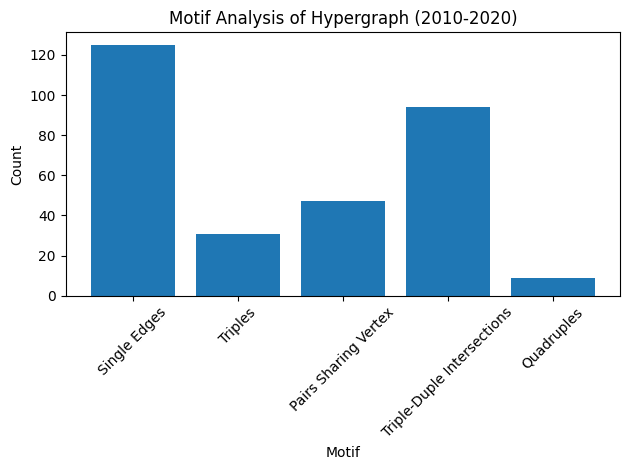

Computation Times: {'Triples': 1.2984999983700618e-05, 'Duples': 1.2919999988980635e-05, 'Triple-Duple Intersections': 0.0009032419999925878, 'Quadruples': 1.473700001497491e-05}


In [ ]:
result = {key: analyze_hypergraph(hypergraph) for key, hypergraph in hypergraphs.items()}

# Output the results
for period, motifs in result.items():
    print(f"Motifs in period {period}: {motifs}")

    if "motif_counts" in motifs:
        print("Motif Counts:", motifs["motif_counts"])
        # Plot motif counts (assuming matplotlib is available)
        plt.bar(motifs["motif_counts"].keys(), motifs["motif_counts"].values())
        plt.xlabel('Motif')
        plt.ylabel('Count')
        plt.title(f'Motif Analysis of Hypergraph ({period})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    if "computation_times" in motifs:
        print("Computation Times:", motifs["computation_times"])

Motifs in period 1990-2000: {'motif_counts': {'Single Edges': 0, 'Triples': 0, 'Pairs Sharing Vertex': 0, 'Triple-Duple Intersections': 0, 'Quadruples': 0}, 'graph': None, 'computation_times': {'Triples': 8.370000159629853e-07, 'Duples': 3.13999976242485e-07, 'Triple-Duple Intersections': 2.33799994475703e-06, 'Quadruples': 3.530000185492099e-07}}
Motif Counts: {'Single Edges': 0, 'Triples': 0, 'Pairs Sharing Vertex': 0, 'Triple-Duple Intersections': 0, 'Quadruples': 0}


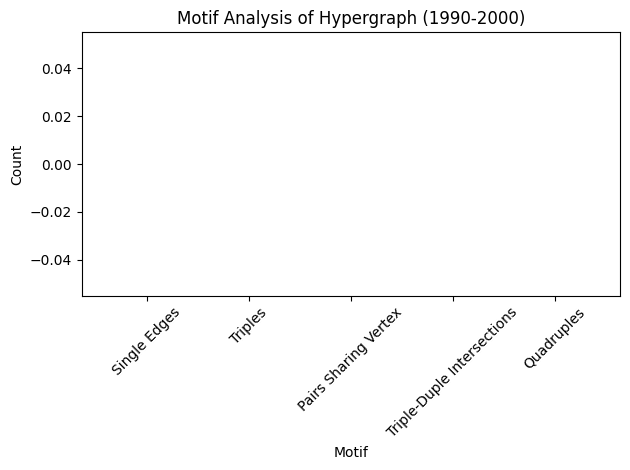

Computation Times: {'Triples': 8.370000159629853e-07, 'Duples': 3.13999976242485e-07, 'Triple-Duple Intersections': 2.33799994475703e-06, 'Quadruples': 3.530000185492099e-07}
Motifs in period 2000-2010: {'motif_counts': {'Single Edges': 10755, 'Triples': 1384, 'Pairs Sharing Vertex': 4661, 'Triple-Duple Intersections': 18695, 'Quadruples': 4091}, 'graph': None, 'computation_times': {'Triples': 0.0023077990000501813, 'Duples': 0.0076076020000073186, 'Triple-Duple Intersections': 5.193802369999958, 'Quadruples': 0.0035992599999872255}}
Motif Counts: {'Single Edges': 10755, 'Triples': 1384, 'Pairs Sharing Vertex': 4661, 'Triple-Duple Intersections': 18695, 'Quadruples': 4091}


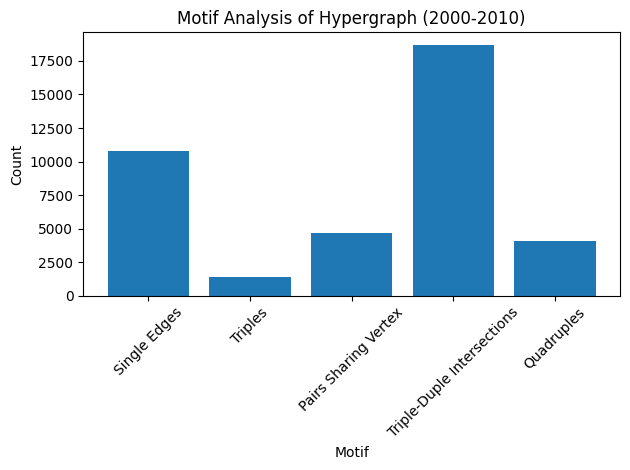

Computation Times: {'Triples': 0.0023077990000501813, 'Duples': 0.0076076020000073186, 'Triple-Duple Intersections': 5.193802369999958, 'Quadruples': 0.0035992599999872255}
Motifs in period 2010-2020: {'motif_counts': {'Single Edges': 125, 'Triples': 31, 'Pairs Sharing Vertex': 47, 'Triple-Duple Intersections': 94, 'Quadruples': 9}, 'graph': None, 'computation_times': {'Triples': 1.3457000022754073e-05, 'Duples': 1.375700003336533e-05, 'Triple-Duple Intersections': 0.0009121819999791114, 'Quadruples': 1.4952000015000522e-05}}
Motif Counts: {'Single Edges': 125, 'Triples': 31, 'Pairs Sharing Vertex': 47, 'Triple-Duple Intersections': 94, 'Quadruples': 9}


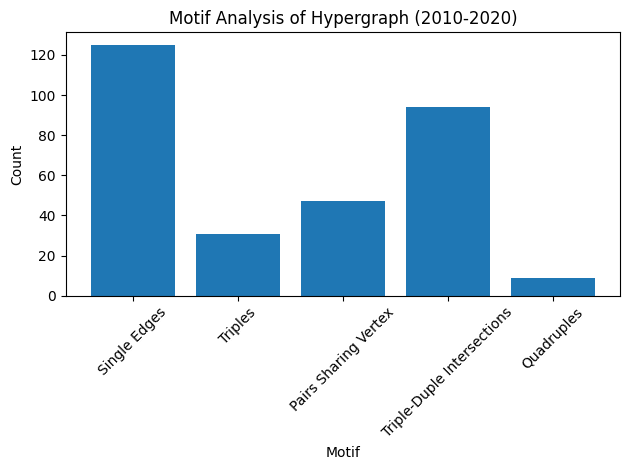

Computation Times: {'Triples': 1.3457000022754073e-05, 'Duples': 1.375700003336533e-05, 'Triple-Duple Intersections': 0.0009121819999791114, 'Quadruples': 1.4952000015000522e-05}


In [ ]:
#result without sampling

result = {key: analyze_hypergraph(hypergraph) for key, hypergraph in hypergraphs.items()}

# Output the results
for period, motifs in result.items():
    print(f"Motifs in period {period}: {motifs}")

    if "motif_counts" in motifs:
        print("Motif Counts:", motifs["motif_counts"])
        # Plot motif counts (assuming matplotlib is available)
        plt.bar(motifs["motif_counts"].keys(), motifs["motif_counts"].values())
        plt.xlabel('Motif')
        plt.ylabel('Count')
        plt.title(f'Motif Analysis of Hypergraph ({period})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    if "computation_times" in motifs:
        print("Computation Times:", motifs["computation_times"])

# configuration model

In [ ]:
!pip install xgi

In [ ]:
from xgi.core.hypergraph import Hypergraph


In [ ]:
def create_null_model(hypergraph):
  """
  Creates a null model of the hypergraph by reshuffling edges.

  Args:
      hypergraph (xgi.core.hypergraph.Hypergraph): The original hypergraph.

  Returns:
      xgi.core.hypergraph.Hypergraph: The null model with reshuffled edges.
  """
  null_graph = Hypergraph()  # Create a new hypergraph object for the null model
  null_graph.add_nodes_from(hypergraph.nodes)  # Copy nodes from the original hypergraph
  edges = list(hypergraph.edges)  # Get a copy of the edges

  # Reshuffle edges using double_edge_swap (assuming it works like this)
  for _ in range(len(edges)):  # Number of shuffles can be adjusted
    i, j = random.sample(range(len(edges)), 2)  # Pick two random edges
    null_graph.add_hyperedge(*xgi.core.hypergraph.utils.swap_edges(edges[i], edges[j]))

  return null_graph


In [ ]:
original_counts = analyze_hypergraph(hypergraph)
null_model = create_null_model(hypergraph)
null_counts = analyze_hypergraph(null_model)

# Compare motif counts between original and null model (statistical tests can be applied)


In [ ]:
import xgi
import random
from collections import Counter



def reshuffle_edges(hypergraph, num_swaps=100):
    """Reshuffles the edges of the hypergraph using the double_edge_swap method from XGI."""
    reshuffled_hypergraph = hypergraph.copy()
    xgi.double_edge_swap(reshuffled_hypergraph, num_swaps)
    return reshuffled_hypergraph

def compare_motifs(original_hypergraph, num_trials=100):
    original_motifs = analyze_hypergraph(original_hypergraph)

    reshuffled_motif_counts = []
    for _ in range(num_trials):
        reshuffled_hypergraph = reshuffle_edges(original_hypergraph)
        reshuffled_motifs = analyze_hypergraph(reshuffled_hypergraph)
        reshuffled_motif_counts.append(reshuffled_motifs)

    # Average the motif counts from the reshuffled hypergraphs
    average_reshuffled_motifs = Counter()
    for motifs in reshuffled_motif_counts:
        average_reshuffled_motifs.update(motifs)
    for key in average_reshuffled_motifs:
        average_reshuffled_motifs[key] /= num_trials

    return original_motifs, average_reshuffled_motifs

# Example usage
if __name__ == "__main__":
    # Assuming you have a way to load your hypergraph for a given period
    period = (2010, 2020)
    hypergraph = load_hypergraph_for_period(period)  # You need to implement this

    original_motifs, reshuffled_motifs = compare_motifs(hypergraph)
    print("Original motifs:", original_motifs)
    print("Average reshuffled motifs:", reshuffled_motifs)
